In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/banknote-authetication/data_banknote_authentication.txt


# *Reading dataset*

In [2]:
df = pd.read_csv('/kaggle/input/banknote-authetication/data_banknote_authentication.txt')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# *Data Analysis*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
np.isinf(df).sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# *Data Visualization*

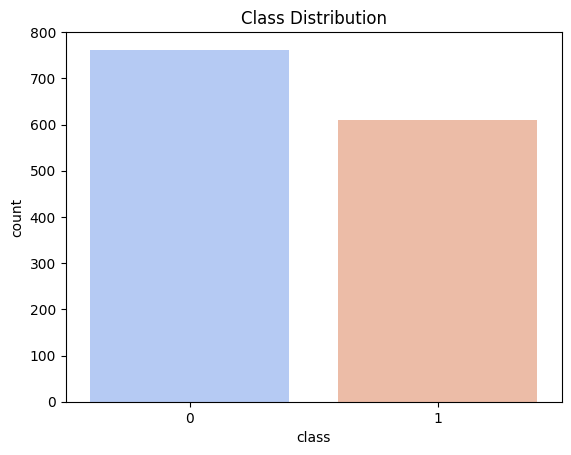

In [7]:
sns.countplot(x="class", data=df, palette="coolwarm")
plt.title("Class Distribution")
plt.show()

<Axes: >

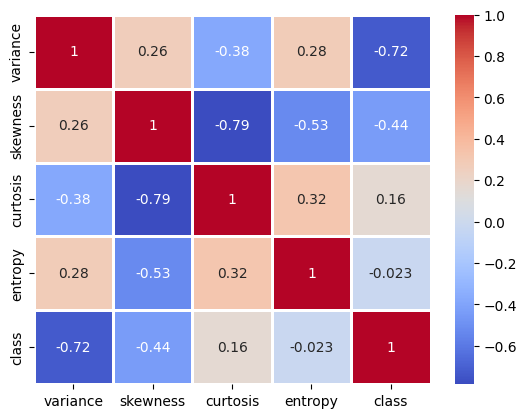

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=2)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

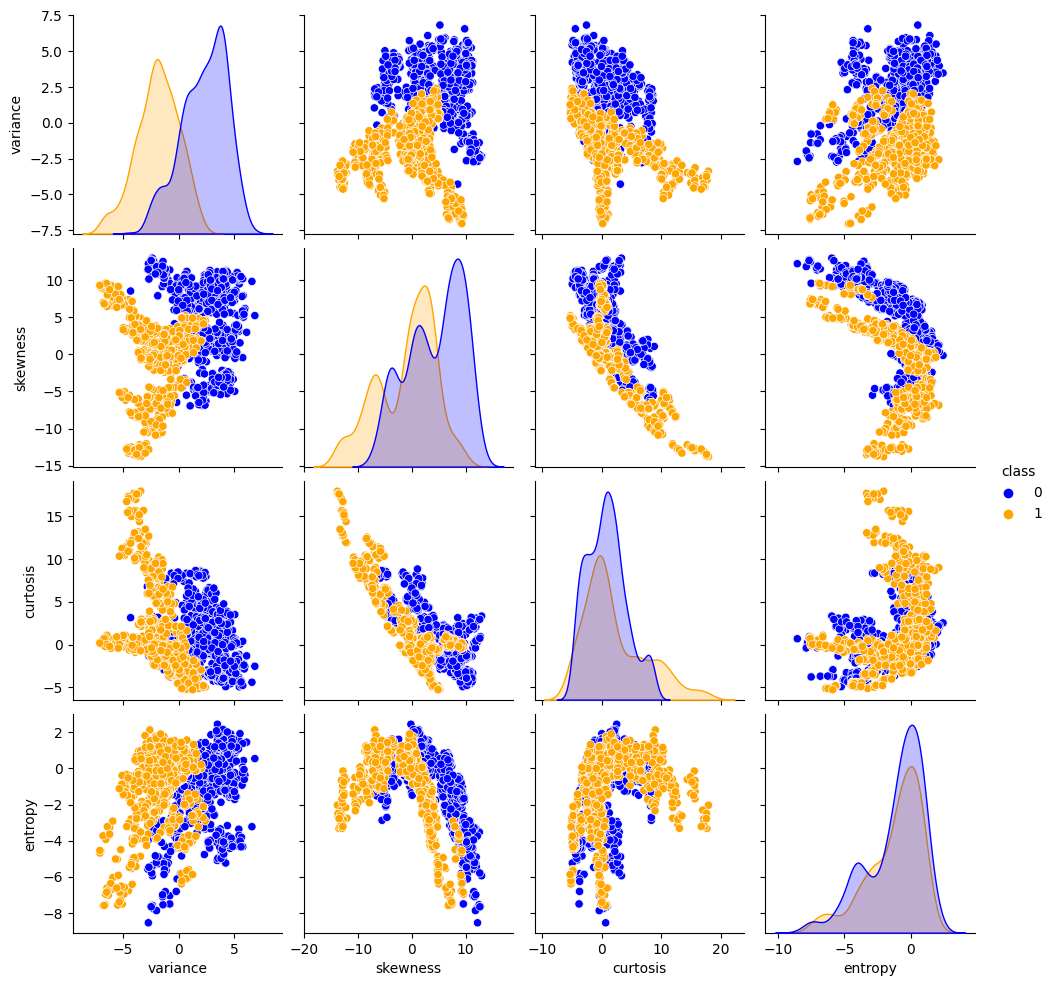

In [9]:
df["class"] = df["class"].astype(str)
sns.pairplot(df, hue="class", palette={ "0": "blue", "1": "orange" }, diag_kind="kde")
plt.show()

# *Separate Dataframes for fake and real notes respectively*

In [10]:
df0 = df[df['class'] == 0]
df0.head()

,variance,skewness,curtosis,entropy,class


In [11]:
df1 = df[df['class'] == 1]
df1.head()

,variance,skewness,curtosis,entropy,class


# *X & y for further training*

In [12]:
X = df.drop(columns=['class'])
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [13]:
y = df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: object

# *Scaling the data*

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# *Model Training and testing using cross_val_score*

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [17]:
score_lr = list(cross_val_score(LogisticRegression(),X,y,cv=3))
score_svm = list(cross_val_score(SVC(),X,y,cv=3))
score_rf = list(cross_val_score(RandomForestClassifier(),X,y,cv=3))

In [18]:
print(score_lr)
print(score_svm)
print(score_rf)

[0.980349344978166, 0.975929978118162, 0.9890590809628009]
[1.0, 1.0, 1.0]
[0.9956331877729258, 0.9934354485776805, 0.9956236323851203]


# *Best model*

In [19]:
avg_lr = sum(score_lr)/len(score_lr)
avg_svm = sum(score_svm)/len(score_svm)
avg_rf = sum(score_rf)/len(score_rf)
best_score = max(avg_lr,avg_svm,avg_rf)
print(best_score)

1.0


In [20]:
best_avg_model = max({'logistic_regression':avg_lr,'SVM':avg_svm,'RandomForestClassifier':avg_rf}, key = lambda x:{'logistic_regression':avg_lr,'SVM':avg_svm,'RandomForestClassifier':avg_rf}[x])
print(f'Most consistent model is {best_avg_model} and accuracy is {best_score}!')

Most consistent model is SVM and accuracy is 1.0!


#                                    Please Upvote me!!!!!!!